In [72]:
import json
from pprint import pprint

with open('output/data_20161009_1217.json') as data_file:    
    data = json.load(data_file)

data

[{'issue_area': 'Infrastructure & Technology',
  'issue_path': '/category/3/',
  'question': "What facets of America's crumbling infrastructure does your plan prioritize?",
  'question_path': '/questions/16190/vote/',
  'submission_date': '2016-10-07T15:34:00',
  'submitter_location': 'NJ',
  'submitters': 'J.D. S.',
  'vote_count': 27},
 {'issue_area': 'Foreign Policy & Military',
  'issue_path': '/category/9/',
  'question': 'Will you both publicly acknowledge war crimes committed by Kissinger?',
  'question_path': '/questions/2675/vote/',
  'submission_date': '2016-09-27T16:42:00',
  'submitter_location': 'NY',
  'submitters': 'Ethan Z.',
  'vote_count': 27},
 {'issue_area': 'Foreign Policy & Military',
  'issue_path': '/category/6/',
  'question': 'Will you Get U.S. out of the United Nations?',
  'question_path': '/questions/4289/vote/',
  'submission_date': '2016-09-27T23:41:00',
  'submitter_location': 'FL',
  'submitters': 'Amadeus F.',
  'vote_count': 27},
 {'issue_area': 'Econ

In [73]:
import pandas as pd 
df = pd.DataFrame(data)

In [74]:
import matplotlib.pyplot as plt

In [75]:
Sorted = df.sort_values(['vote_count'], ascending=False)
Sorted.head(3)

,issue_area,issue_path,question,question_path,submission_date,submitter_location,submitters,vote_count
6439,Society & Community,/category/10/,Would you support requiring criminal backgroun...,/questions/6335/vote/,2016-09-28T21:32:00,CA,Richard M.,74955
6438,Society & Community,/category/3/,How will you ensure the 2nd amendment is prote...,/questions/308/vote/,2016-09-27T11:11:00,None,Tim S.,64861
6437,Economy & Jobs,/category/5/,"Do you support expanding, and not cutting, Soc...",/questions/5087/vote/,2016-09-28T11:07:00,NC,Ellen P.,44416


In [76]:
df.describe()

,vote_count
count,6440.000000
mean,482.270497
std,2590.590932
min,27.000000
25%,40.000000
50%,64.000000
75%,137.000000
max,74955.000000


The most popular name


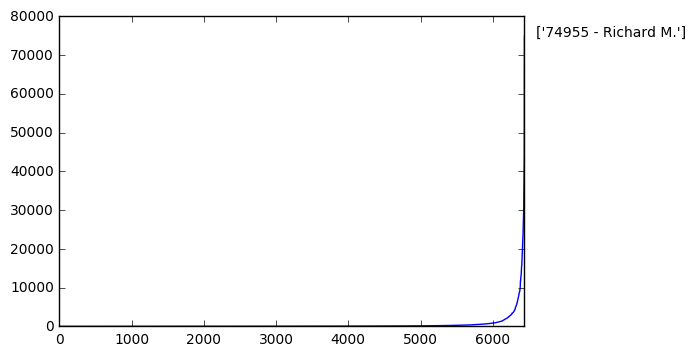

In [84]:
df['vote_count'].plot()

# Maximum value in the data set
MaxValue = df['vote_count'].max()

# Name associated with the maximum value
MaxName = df['submitters'][df['vote_count'] == df['vote_count'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['vote_count'] == df['vote_count'].max()]
plt.show()


/Users/fje630/Projects/envs/poq/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


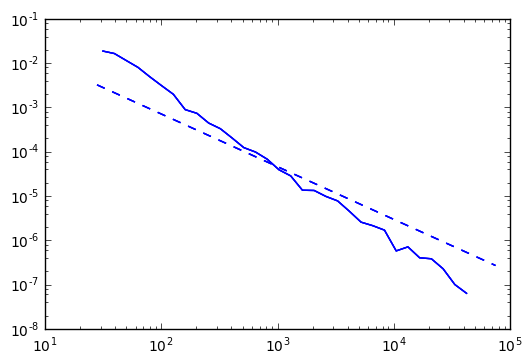

alpha=  1.19000721916   sigma=  0.00236770269367


In [95]:
import powerlaw
import numpy

fit = powerlaw.Fit(numpy.array(df['vote_count'])+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')
plt.show()

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)


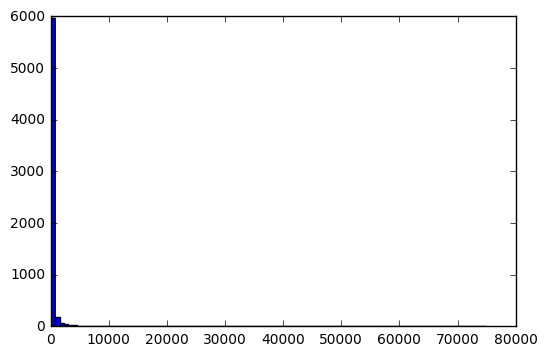

In [106]:
plt.hist(df['vote_count'], bins=100)
plt.show()

In [135]:
grouped = df.groupby('submitter_location').size()
grouped.reset_index()
grouped.sort_values(inplace=True, ascending=False)
grouped

submitter_location
CA    825
NY    517
TX    453
FL    367
IL    275
NJ    240
PA    237
VA    222
NC    209
WA    180
MA    179
OH    179
MD    158
MO    151
GA    144
CO    136
OR    127
IN    116
MI    112
AZ    105
MN     99
TN     98
WI     98
DC     72
CT     71
AL     64
KY     63
SC     59
NV     50
OK     47
SD     45
LA     42
NM     40
AR     39
UT     37
MS     36
KS     35
ID     30
IA     30
RI     29
ME     23
MT     23
AK     22
HI     21
WV     20
NE     18
NH     17
WY     17
VT     15
DE     12
PR      4
ND      2
dtype: int64

In [111]:
plt.hist(df['vote_count'], bins=100)
plt.show()

,issue_area,issue_path,question,question_path,submission_date,submitter_location,submitters,vote_count
0,Infrastructure & Technology,/category/3/,What facets of America's crumbling infrastruct...,/questions/16190/vote/,2016-10-07T15:34:00,NJ,J.D. S.,27
1,Foreign Policy & Military,/category/9/,Will you both publicly acknowledge war crimes ...,/questions/2675/vote/,2016-09-27T16:42:00,NY,Ethan Z.,27
2,Foreign Policy & Military,/category/6/,Will you Get U.S. out of the United Nations?,/questions/4289/vote/,2016-09-27T23:41:00,FL,Amadeus F.,27
3,Economy & Jobs,/category/6/,Have you manufactured any products in foreign ...,/questions/3508/vote/,2016-09-27T19:13:00,MD,AJoyce M.,27
4,Education,/category/3/,How will you change students loans so they don...,/questions/9809/vote/,2016-10-01T18:52:00,MD,Karen S.,27
5,Health,/category/4/,How are you going to fix the shortage of healt...,/questions/11275/vote/,2016-10-03T18:17:00,MD,Jason D.,27
6,Foreign Policy & Military,/category/8/,How will you contain North Korea?,/questions/5962/vote/,2016-09-28T17:33:00,CT,Joseph B.,27
7,Health,/category/6/,What is your position on the Hyde Amendment?,/questions/9817/vote/,2016-10-01T19:09:00,NY,Barbara K.,27
8,Foreign Policy & Military,/category/8/,As President what will you do to secure our bo...,/questions/14746/vote/,2016-10-07T01:00:00,NY,Eileen M.,27
9,Foreign Policy & Military,/category/6/,How would you balance creating a pathway to ci...,/questions/8310/vote/,2016-09-30T02:59:00,CA,Alexander D.,27
